# Standardize data using the Scale Function

In the previous notebook we standardized the data manually by subtracting the mean and dividing it by the standard deviation. Nowe we will use scikit learn's preprocessing functions and estimators to perform standardization for us.
- Standardscaler and scale funtion perform the same standardization
- Estimator function can also be used to  calculate the mean and variance values in one data set and use those values to standardize another data set

We will be used the absenteeism data set for this notebook as well

In [1]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import StandardScaler, scale

In [2]:
data = pd.read_csv('Datasets/absenteeism_processed.csv')

In [3]:
data.head(10)

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0
5,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
6,361.0,52.0,3.0,28.0,239.554,80.0,172.0,27.0,8.0
7,260.0,50.0,11.0,36.0,239.554,65.0,168.0,23.0,4.0
8,155.0,12.0,14.0,34.0,239.554,95.0,196.0,25.0,40.0
9,235.0,11.0,14.0,37.0,239.554,88.0,172.0,29.0,8.0


In [4]:
data.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,29.631081,12.554054,36.450000,271.490235,79.035135,172.114865,26.677027,6.924324
std,66.952223,14.836788,4.384873,6.478772,39.058116,12.883211,6.034995,4.285452,13.330998
min,118.000000,5.000000,1.000000,27.000000,205.917000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244.387000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264.249000,83.000000,170.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,294.217000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378.884000,108.000000,196.000000,38.000000,120.000000


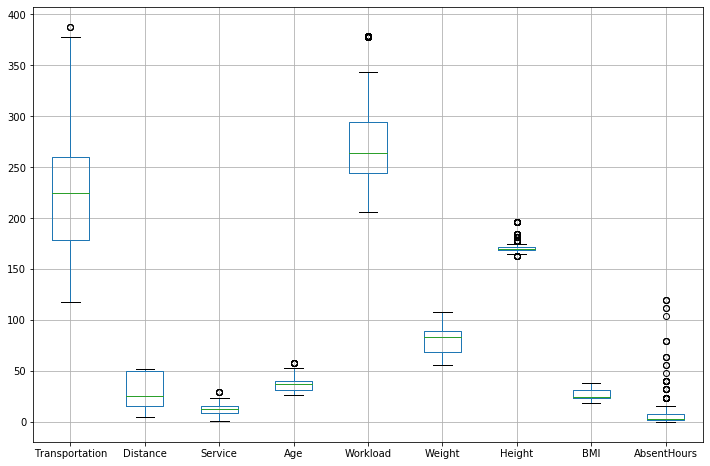

In [5]:
data.boxplot(figsize=(12, 8))

We notice a couple of things after plotting the features in our data set
- Their scales are completely different
- They have widely different means and standard deviations
- Many features have outliers 

To scale this data we will use the scale preprocessing function from scikit learn, this function accepts an array-like values as input so we can pass the panda column directly. The scale function will automatically take care of centering your features to the mean value and will perform a component wide scaling to have each feature be of unit variance.

In [6]:
scaled_data = pd.DataFrame()

scaled_data['Transportation'] = scale(data['Transportation'])
scaled_data['Distance'] = scale(data['Distance'])
scaled_data['AbsentHours'] = scale(data['AbsentHours'])

In [7]:
scaled_data.describe()

,Transportation,Distance,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,8.487898e+00


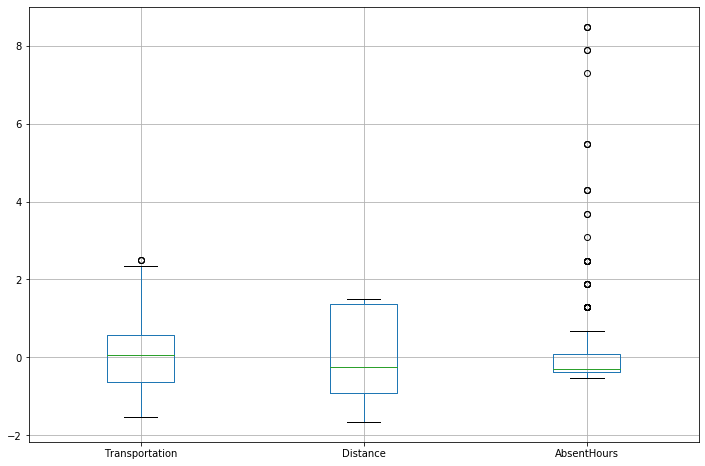

In [8]:
scaled_data.boxplot(figsize=(12, 8))

Note: The presence of outliers, such as in the AbsentHours datapoint, at the upper end results in moving the average up- the outliers disproportionately affect the mean. This means that the StandardScaler is sensitive to the presence of outliers. 

In [9]:
scaled_array = scale(data, copy=True, with_mean=True, with_std=True)

- copy: Make copy before scaling, original data remains unaffected
- with_mean: Center data before scaling
- with_std: Scale to unit variance

In [10]:
type(scaled_array)

numpy.ndarray

In [11]:
scaled_array.shape

(740, 9)

In [12]:
scaled_data = pd.DataFrame(scale(data), columns=data.columns)

In [14]:
scaled_data.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17,-3.660735e-17,-4.626929e-16,1.866148e-15,2.794311e-17,-1.015329e-15,-1.215244e-16,9.751959e-17
std,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00,-2.636762e+00,-1.459596e+00,-1.679999e+00,-1.789206e+00,-1.511357e+00,-1.792627e+00,-5.197666e-01
25%,-6.326655e-01,-9.193567e-01,-8.110742e-01,-8.417777e-01,-6.943900e-01,-7.794581e-01,-5.164829e-01,-6.251003e-01,-3.696389e-01
50%,5.485632e-02,-2.449005e-01,1.017698e-01,8.495004e-02,-1.855218e-01,3.079626e-01,-3.506706e-01,-3.915949e-01,-2.945750e-01
75%,5.779707e-01,1.373794e+00,7.864028e-01,5.483139e-01,5.822640e-01,7.740000e-01,-1.904601e-02,1.009438e+00,8.074438e-02
max,2.491075e+00,1.508686e+00,3.753146e+00,3.328497e+00,2.751449e+00,2.249785e+00,3.960449e+00,2.643976e+00,8.487898e+00


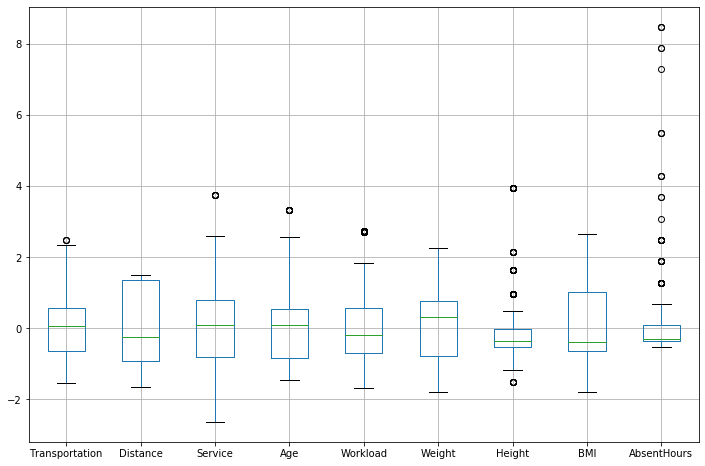

In [15]:
scaled_data.boxplot(figsize=(12, 8))

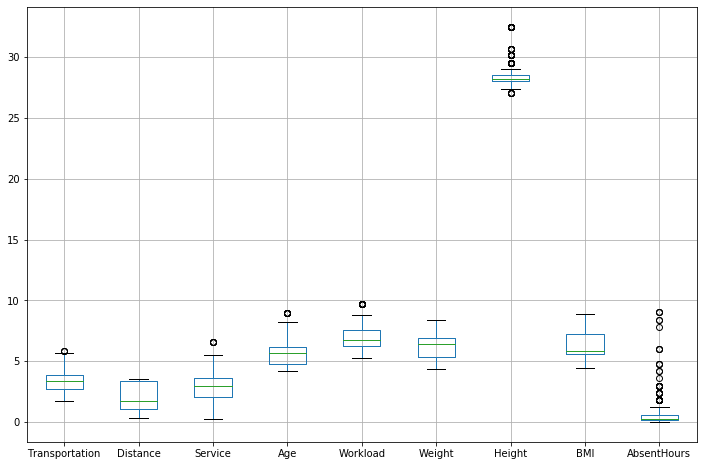

In [17]:
scaled_data = pd.DataFrame(scale(data, with_mean=False), columns=data.columns)
# keeps original means of the data
scaled_data.boxplot(figsize=(12, 8))

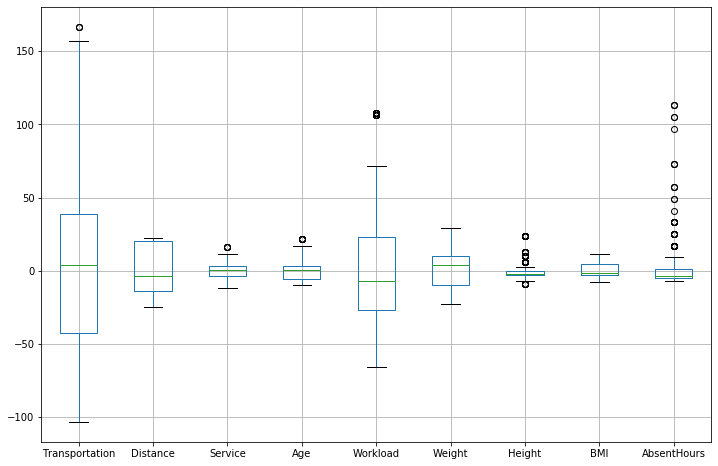

In [19]:
scaled_data = pd.DataFrame(scale(data, with_std=False), columns=data.columns)
# data is centered around a mean of 0 but have their default standard deviations
scaled_data.boxplot(figsize=(12, 8))

Next, we will us the StandardScaler estimator API which is used to perform scaling- has the fit(), transform() and fit_transform() functions
- Estimators make up the individual components of scikit-learn's ML pipeline, preprocessing estimators preprocess the data
- The fit function will compute the mean and standard deviation on the data passed in, the mean and stdev calculated will be used later to scale data sets (this one and others that would be used for testing later)
- The transform function is what actually scales the dataset with the computed mean dn stdev from the fit function
- You can fit one dataset and use its calculated mean and stdev to use transform on a different dataset
- To call fit and transform on the same dataset we can use teh fit_transform function

In [20]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
std_scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_array = std_scaler.transform(data)

In [23]:
scaled_array.shape

(740, 9)

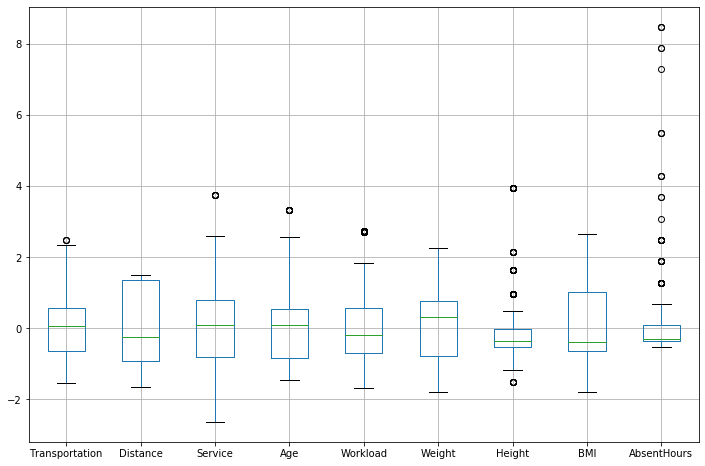

In [25]:
scaled_data = pd.DataFrame(scaled_array, columns=data.columns)

scaled_data.boxplot(figsize=(12, 8))

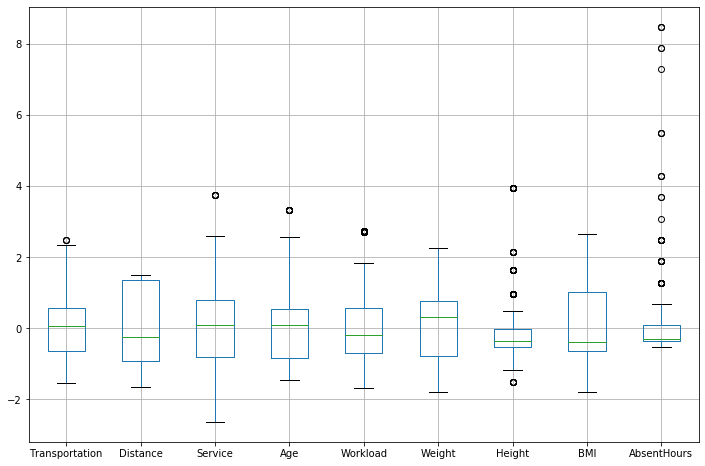

In [26]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_array = std_scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_array, columns=data.columns)

scaled_data.boxplot(figsize=(12, 8))

We can access the StandardScaler's estimator properties so see how the standardization was performed
- mean_ : mean values for individual features
- var_ : variances
- scale_ : standard deviations
- n_samples_seen_ : how many samples were included in the standardization

In [27]:
std_scaler.mean_

array([221.32972973,  29.63108108,  12.55405405,  36.45      ,
       271.49023514,  79.03513514, 172.11486486,  26.67702703,
         6.92432432])

In [28]:
std_scaler.var_

array([4476.54262966,  219.83281775,   19.20113221,   41.91777027,
       1523.47490444,  165.75281958,   36.3719412 ,   18.34028305,
        177.47535427])

In [29]:
std_scaler.scale_

array([66.90696996, 14.82676019,  4.38190965,  6.47439343, 39.03171665,
       12.87450269,  6.03091545,  4.28255567, 13.32198762])

In [30]:
std_scaler.n_samples_seen_

740

### Bessel's correction

This technique which corrects the bias in the estimation of the population's variance, use n-1 rather than n for calculating the variance

We can apply this correction to the scaled data from StandardScaler by applying this formula:

x_scaled $ = (x - mean(x))/(stdev(x)*besselsCorrection) $

In [31]:
n = data.shape[0]

bessels_correction_adjustment = math.sqrt((n-1) / n)
bessels_correction_adjustment

0.9993240959011489

In [32]:
scaled_data['Distance_Bessels'] = (scaled_data['Distance'] - scaled_data['Distance'].mean()) /\
        (scaled_data['Distance'].std() * bessels_correction_adjustment)

In [33]:
scaled_data[['Distance', 'Distance_Bessels']].head(10)

,Distance,Distance_Bessels
0,0.429556,0.429556
1,-1.121694,-1.121694
2,1.441240,1.441240
3,-1.661258,-1.661258
4,0.429556,0.429556
5,1.441240,1.441240
6,1.508686,1.508686
7,1.373794,1.373794
8,-1.189139,-1.189139
9,-1.256585,-1.256585


Scaled values using the Bessel's correction will be close to the original scaled values (as seen here) when n is very large